# Machine Learning 2 - Neural Networks

In this lab, we will use simple Neural Networks to classify the images from the simplified CIFAR-10 dataset. We will compare our results with those obtained with Decision Trees and Random Forests.

Lab objectives
----
* Classification with neural networks
* Influence of hidden layers and of the selected features on the classifier results

In [6]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image
        
dataset = CIFAR10('./CIFAR10/')

Pre-loading training data
Pre-loading test data


We will use the *[Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)* implementation from scikit-learn, which is only available since version 0.18. You can check which version of scikit-learn is installed by executing this :

In [7]:
import sklearn
print(sklearn.__version__)

0.23.1


If you have version 0.17 or older, please update your scikit-learn installation (for instance, with the command *pip install scikit-learn==0.19.1* in the terminal or Anaconda prompt)

## Build a simple neural network

* Using the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from scikit-learn, create a neural network with a single hidden layer.
* Train this network on the CIFAR dataset.
* Using cross-validation, try to find the best possible parameters.

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.n_layers = 3

In [8]:
clf.fit(dataset.train['hog'], dataset.train['labels'])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 0.8485333333333334
[[4220  540  240]
 [ 475 3970  555]
 [ 106  356 4538]]


In [11]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Predictive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Predictive score 0.7946666666666666
[[815 138  47]
 [121 721 158]
 [ 30 122 848]]


In [19]:
# On code nous-mêmes la cross validation
from sklearn.model_selection import StratifiedKFold

def cross_validation(alpha=1.0, max_iter=1000, activation="relu"):
    kf = StratifiedKFold(5)

    scores = []

    for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
        train_x = dataset.train['hog'][train]
        train_y = dataset.train['labels'][train]

        test_x = dataset.train['hog'][test]
        test_y = dataset.train['labels'][test]
    
        clf = MLPClassifier(alpha=alpha, max_iter=max_iter, activation=activation)
        clf.n_layers = 3
        
        clf.fit(train_x, train_y)
        
        pred = clf.predict(test_x)
        score = accuracy_score(test_y, pred)
        
        scores.append(score)
    return scores

In [13]:
alpha = [0.001, 0.01, 0.1, 1.0]
max_iter = [200, 400, 800, 1000]

In [15]:
import numpy as np

In [16]:
for a in alpha:
    print("Alpha ", a)
    for i in max_iter:
        print("Max iter ", i)
        scores = cross_validation(alpha=a, max_iter=i)
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Alpha  0.001
Max iter  200


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7861333333333334
Max iter  400


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7945333333333334
Max iter  800


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7888666666666667
Max iter  1000


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perce

La moyenne est  0.7906
Alpha  0.01
Max iter  200


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7802
Max iter  400


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7955333333333334
Max iter  800


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


La moyenne est  0.8003333333333332
Max iter  1000
La moyenne est  0.7992666666666668
Alpha  0.1
Max iter  200
La moyenne est  0.7447333333333334
Max iter  400
La moyenne est  0.7455333333333334
Max iter  800
La moyenne est  0.7460666666666667
Max iter  1000
La moyenne est  0.7441333333333333
Alpha  1.0
Max iter  200
La moyenne est  0.5586
Max iter  400
La moyenne est  0.5563333333333335
Max iter  800
La moyenne est  0.5515333333333333
Max iter  1000
La moyenne est  0.552


In [17]:
activation = ["identity", "logistic", "tanh", "relu"]
alpha = [0.001, 0.01]

In [20]:
to_plot = []
for a in alpha:
    print("Alpha ", a)
    for i in max_iter:
        print("Max iter ", i)
        for act in activation:
            print("Activation ", act)
            scores = cross_validation(alpha=a, max_iter=i, activation=act)
            to_plot.append(scores)
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Alpha  0.001
Max iter  200
Activation  identity
La moyenne est  0.7460000000000001
Activation  logistic


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7493333333333334
Activation  tanh
La moyenne est  0.7466666666666668
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7867999999999999
Max iter  400
Activation  identity
La moyenne est  0.7455999999999999
Activation  logistic
La moyenne est  0.7485333333333333
Activation  tanh
La moyenne est  0.7465333333333334
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7957333333333334
Max iter  800
Activation  identity
La moyenne est  0.7452666666666666
Activation  logistic
La moyenne est  0.7494
Activation  tanh
La moyenne est  0.7470000000000001
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7894666666666666
Max iter  1000
Activation  identity
La moyenne est  0.7477333333333334
Activation  logistic
La moyenne est  0.7474666666666667
Activation  tanh
La moyenne est  0.7468
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perce

La moyenne est  0.7914666666666668
Alpha  0.01
Max iter  200
Activation  identity
La moyenne est  0.747
Activation  logistic


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7414666666666666
Activation  tanh
La moyenne est  0.7475333333333334
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7821333333333333
Max iter  400
Activation  identity
La moyenne est  0.7461333333333333
Activation  logistic


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7448666666666666
Activation  tanh
La moyenne est  0.7473333333333334
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

La moyenne est  0.7957333333333333
Max iter  800
Activation  identity
La moyenne est  0.7472666666666667
Activation  logistic
La moyenne est  0.7448666666666668
Activation  tanh
La moyenne est  0.7462
Activation  relu


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


La moyenne est  0.8024666666666667
Max iter  1000
Activation  identity
La moyenne est  0.7474666666666667
Activation  logistic
La moyenne est  0.7456666666666667
Activation  tanh
La moyenne est  0.7472666666666667
Activation  relu
La moyenne est  0.8038000000000001


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [66]:
x = np.array(max_iter)
y_1 = to_plot[:len(to_plot)//2]
identity = y_1[::4]
logistic = y_1[1::4]
tanh = y_1[2::4]
relu = y_1[3::4]

In [67]:
dictionary = {}
dictionary2 = {}
dictionary3 = {}
dictionary4 = {}
for i in range(len(max_iter)):
    dictionary[str(max_iter[i])] = identity[i]
    dictionary2[str(max_iter[i])] = logistic[i]
    dictionary3[str(max_iter[i])] = tanh[i]
    dictionary4[str(max_iter[i])] = relu[i]
dictionary

{'200': [0.7456666666666667, 0.758, 0.7443333333333333, 0.734, 0.748],
 '400': [0.7433333333333333,
  0.754,
  0.746,
  0.7373333333333333,
  0.7473333333333333],
 '800': [0.742, 0.754, 0.744, 0.736, 0.7503333333333333],
 '1000': [0.748,
  0.7586666666666667,
  0.7463333333333333,
  0.7326666666666667,
  0.753]}

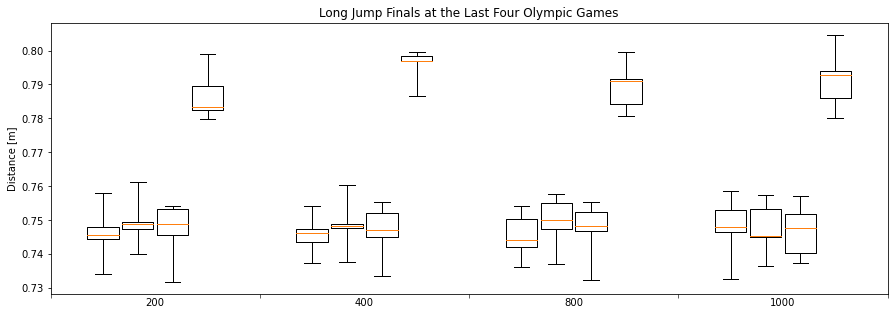

In [68]:
identity = pd.DataFrame(dictionary)
logistic = pd.DataFrame(dictionary2)
tanh = pd.DataFrame(dictionary3)
relu = pd.DataFrame(dictionary4)
datasets = [identity, logistic, tanh, relu]

# Set x-positions for boxes
x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
x_pos = (x_pos_range * 0.5) + 0.75

# Plot
plt.figure(figsize=(15,5))
for i, data in enumerate(datasets):
    bp = plt.boxplot(
        np.array(data), sym='', whis=[0, 100], widths=0.6 / len(datasets),
        labels=list(datasets[0]),
        positions=[x_pos[i] + j * 1 for j in range(len(data.T))]
    )

# Titles

plt.title('Long Jump Finals at the Last Four Olympic Games')
plt.ylabel('Distance [m]')
# Axis ticks and labels
plt.xticks(np.arange(len(list(datasets[0]))) + 1)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(
    np.array(range(len(list(datasets[0])) + 1)) + 0.5)
)
plt.gca().tick_params(axis='x', which='minor', length=4)
plt.gca().tick_params(axis='x', which='major', length=0)
# Change the limits of the x-axis
plt.xlim([0.5, len(list(datasets[0])) + 0.5])

plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

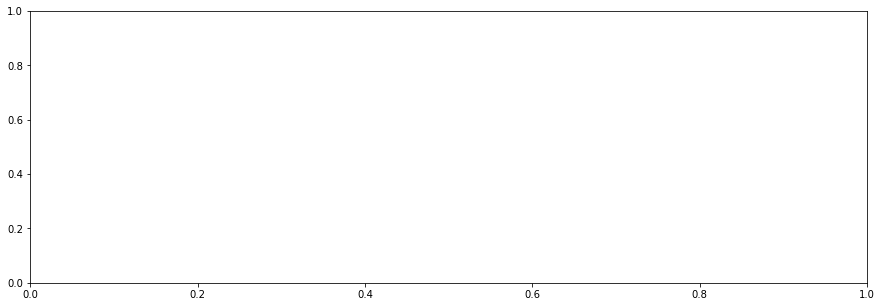

In [44]:
plt.figure(figsize=(15,5))
plt.boxplot(data1,0,'',positions=x-100,widths=150)
plt.boxplot(data2,0,'',positions=x+100,widths=150)
plt.xlim(500,2500)
plt.xticks(x)
plt.show()

## Add hidden layers to the network.

Try to change the structure of the network by adding hidden layers. Using cross-validation, try to find the best architecture for your network.

In [ ]:

## -- Your code here -- ##
